In [1]:
]activate ../../../

  Activating project at `~/UCLOneDrive/SpatialStructureInMicrobialCommunities/SSMCCode`


In [2]:
using Revise
includet("./base.jl")

In [3]:
using GLMakie
using CairoMakie
CairoMakie.activate!()

In [4]:
import DataFrames: metadata as md

# Setup

In [5]:
function plot_spatial_fs(u, Ns, sN, dx;
    figure=(;),
    axis=(;),
)
    Nr = size(u)[1] - Ns
    xs = ((1:sN) .- 0.5) .* dx
    
    fig = Figure(; figure...)
    axs = Axis(fig[1,1]; axis...)
    axr = Axis(fig[2,1]; axis...)
    linkxaxes!(axs, axr)
    hidexdecorations!(axs)
    rowgap!(fig.layout, 2.)

    for i in 1:Ns
        lines!(axs, xs, u[i,:])
    end
    for a in 1:Nr
        lines!(axr, xs, u[Ns+a,:])
    end

    fig
end
# f = plot_spatial_fs(xx.final_states[4], N, dx)
# display(GLMakie.Screen(), f)
# f

plot_spatial_fs (generic function with 1 method)

# Run 1/2 - both rslt_df1 and rslt_df2
- N=M=20
- pe=pei=0.15 <=> B = 3
- Ds are 1e-6, 1., 1.
- slightly varied lognormal m
- L=5 with 5000 grid points

In [99]:
f = jldopen("./rslt_df1.jld2")
f2 = jldopen("./rslt_df2.jld2")
df = vcat(f["df"], f2["df"])
close(f)
close(f2)

N = md(df, "N")
M = md(df, "M")
sN = md(df, "sN")
dx = md(df, "dx")

@printf "There are %d runs out of %d that did not finish at T\n" count(!=(md(df, "T")), df.final_Ts) nrow(df)
@show N, M;

There are 1 runs out of 26 that did not finish at T
(N, M) = (20, 20)


In [7]:
sr = rand(eachrow(df));

In [8]:
ps = sr.params
ss = sr.steadystates;
cmin = max(minimum(abs, ss), eps())
css = clamp.(ss, cmin, Inf);

### Spatial final state

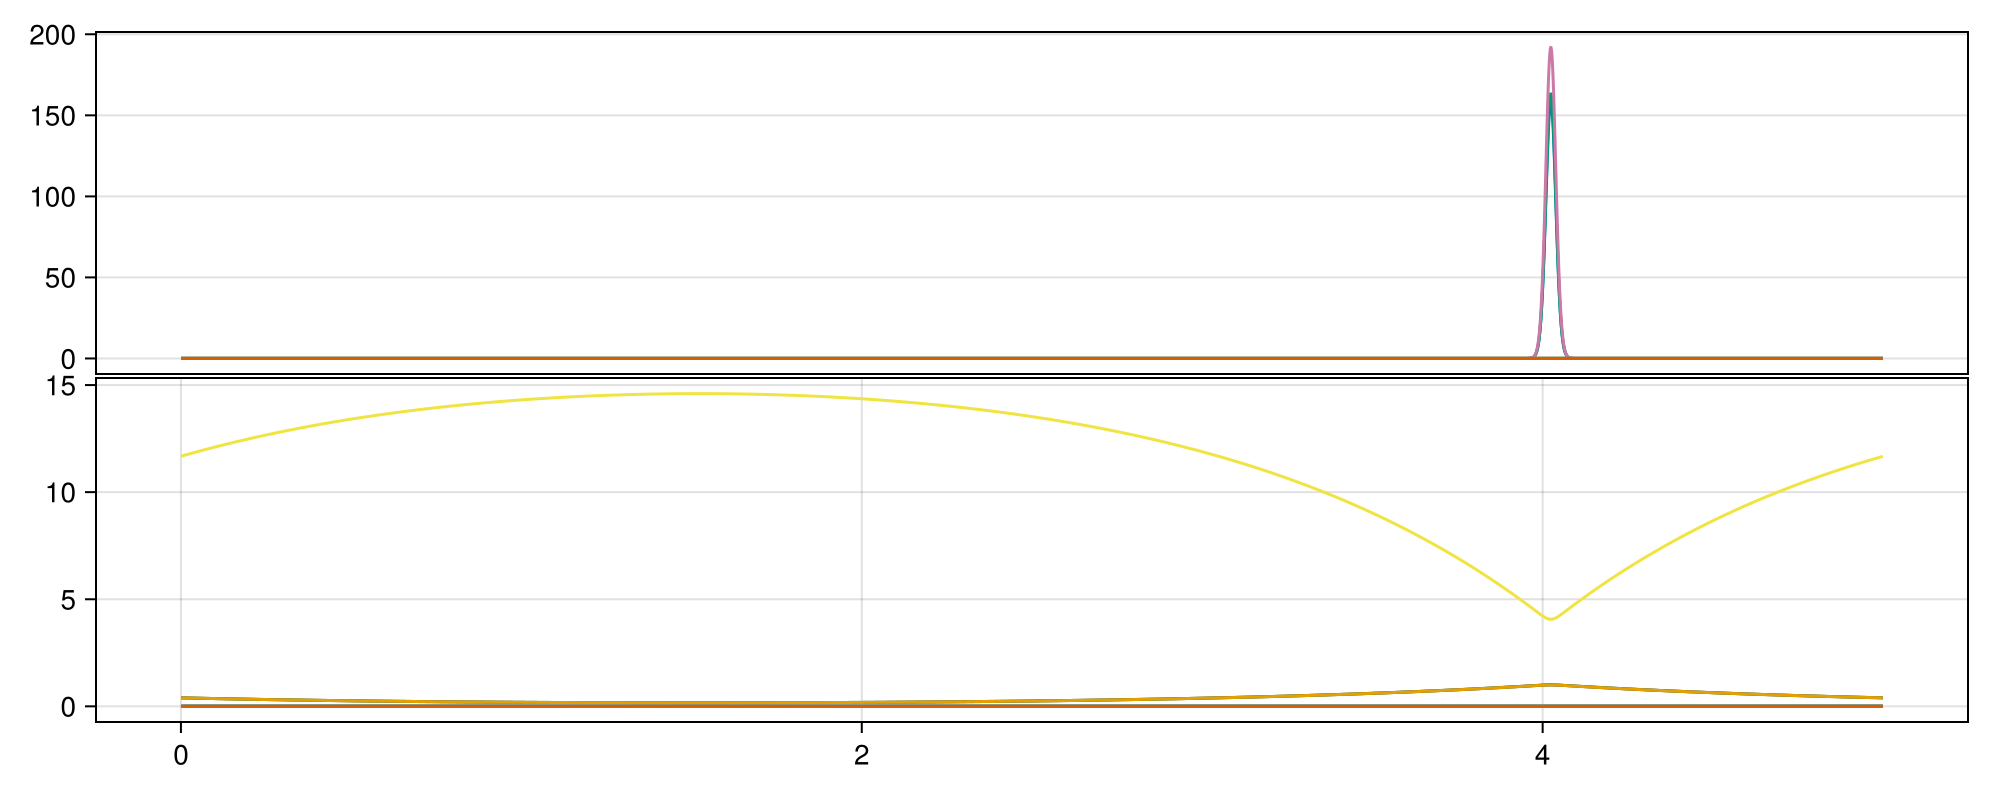

In [9]:
plot_spatial_fs(sr.final_states, N, sN, dx;
    figure=(; size=(1000, 400))
)

### No-space ss and network structure

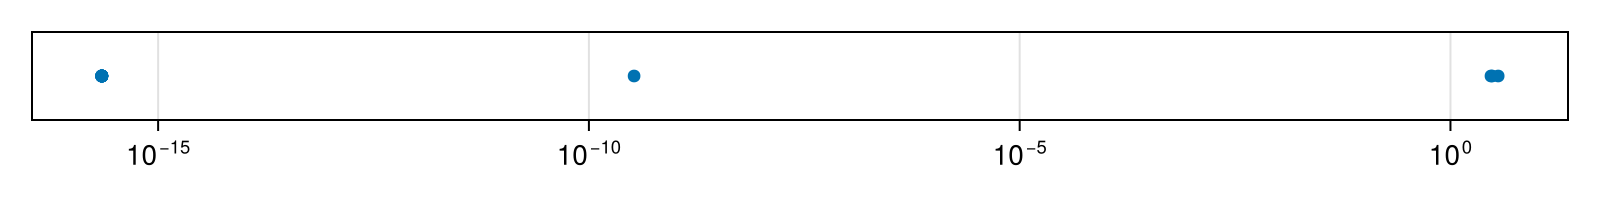

In [10]:
scatter(css[1:N], fill(1, N);
    figure=(; size=(800, 100)),
    axis=(;
        xscale=log10,
        yticks=([], [])
    )
)

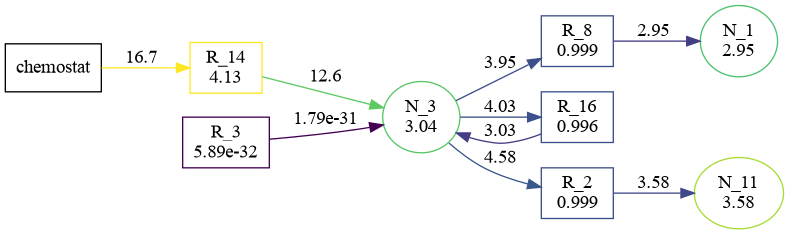

In [11]:
diagram_sfss_v3(sr.params, sr.steadystates;
    strain_threshold=1e-2,
    # colorscale=log10,
)

### Linstab

In [12]:
k_to_evals = linstab_make_k_func(ps, ss)
# ks = 10 .^ range(-5, 3, 100)
ks = range(0.001, 50, 1000)
@time evals = k_to_evals.(ks);

  0.393469 seconds (368.55 k allocations: 59.612 MiB, 8.46% gc time, 94.23% compilation time)


[ Info: Unstable, mrl is 0.0202128


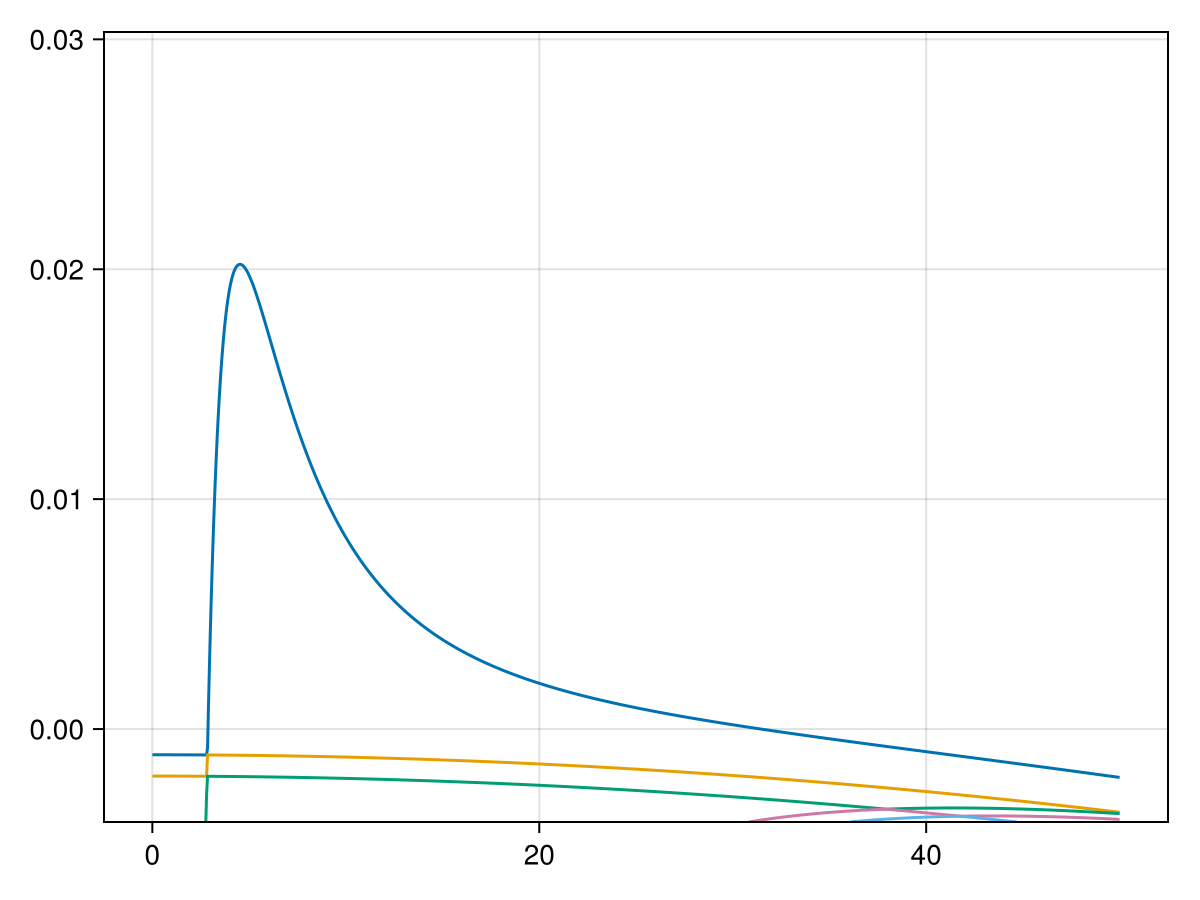

In [13]:
faa = plot_linstab_lambdas(ks, evals;
    axis=(;
        # xscale=log10
    ),
    legend=false
)

# display(GLMakie.Screen(), faa.figure)
faa

# Run 3 - rslt_df3 (N=M=50, otherwise same as Runs 1/2)
- N=M=50
- pe=pei=0.06 <=> B = 3
- Ds are 1e-6, 1., 1.
- slightly varied lognormal m
- L=5 with 5000 grid points

In [19]:
f = jldopen("./rslt_df3.jld2")
df = copy(f["df"])
close(f)

N = md(df, "N")
M = md(df, "M")
sN = md(df, "sN")
dx = md(df, "dx")

@printf "There are %d runs out of %d that did not finish at T\n" count(!=(md(df, "T")), df.final_Ts) nrow(df)
@show N, M;

There are 0 runs out of 6 that did not finish at T
(N, M) = (50, 50)


In [44]:
df.numsurv

6-element Vector{Int64}:
 2
 3
 4
 5
 3
 8

In [100]:
sr = rand(eachrow(df));
sr = df[3,:];

In [101]:
ps = sr.params
ss = sr.steadystates;
cmin = max(minimum(abs, ss), eps())
css = clamp.(ss, cmin, Inf);

### Spatial final state

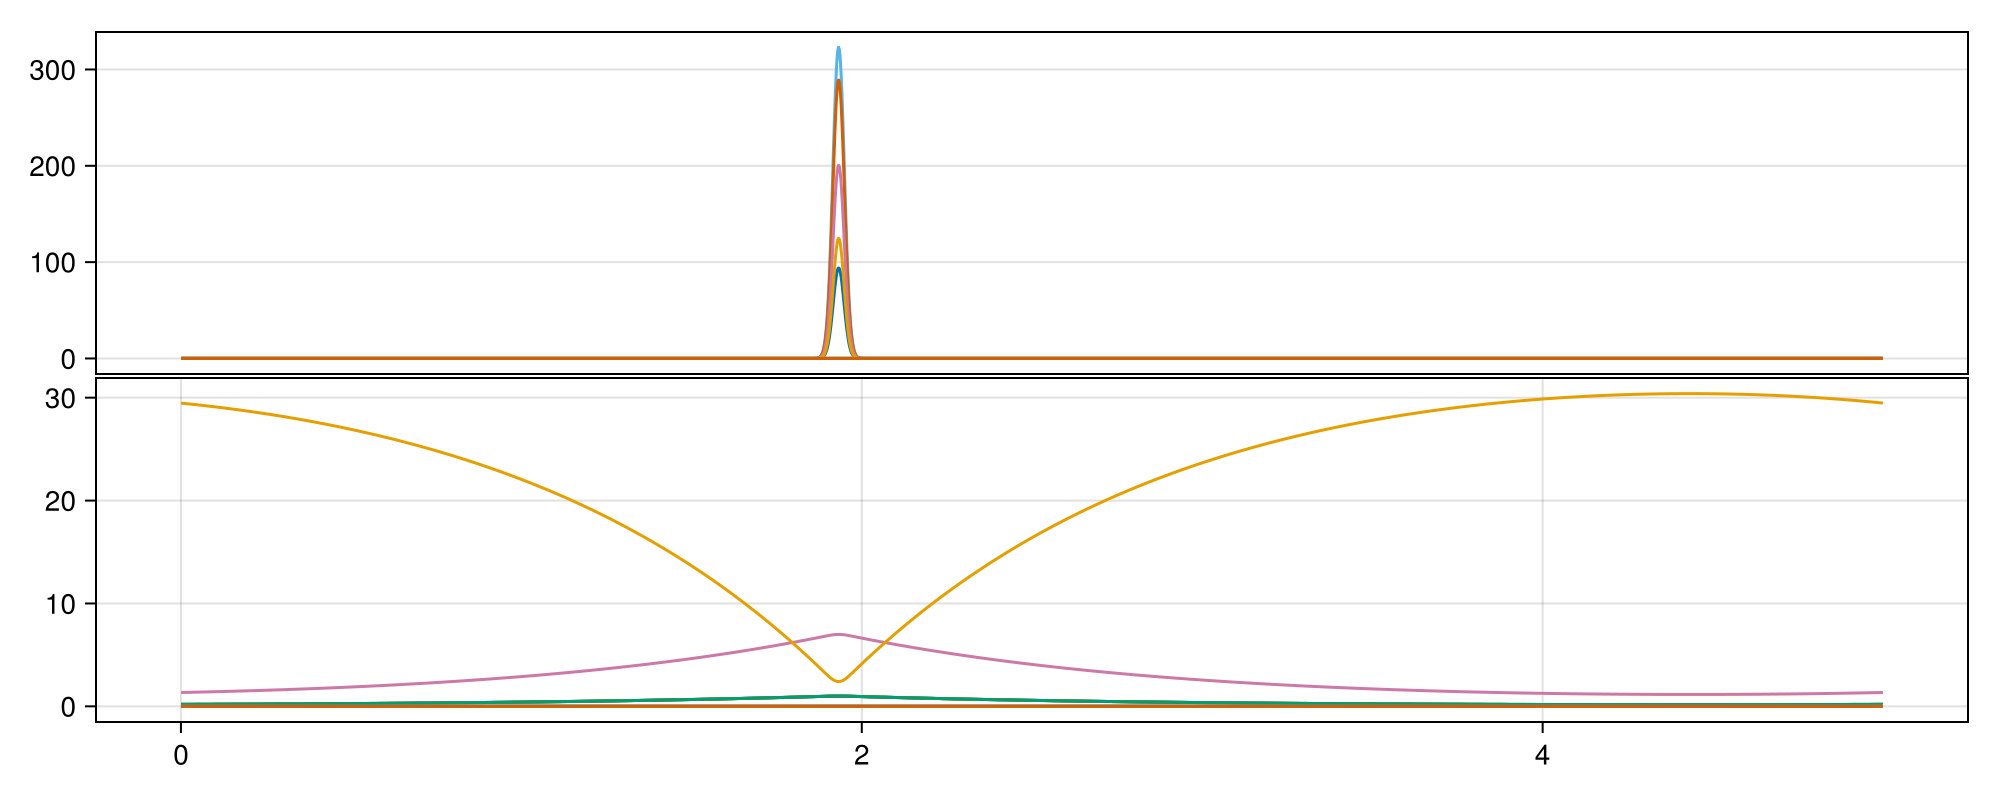

In [102]:
plot_spatial_fs(sr.final_states, N, sN, dx;
    figure=(; size=(1000, 400))
)

### No-space ss and network structure

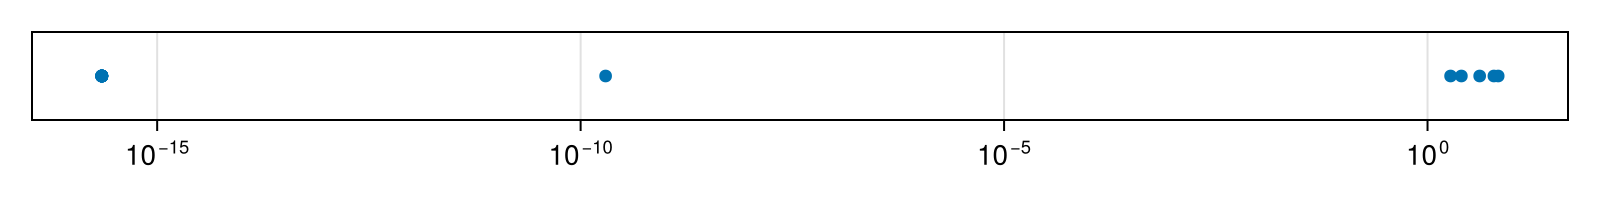

In [103]:
scatter(css[1:N], fill(1, N);
    figure=(; size=(800, 100)),
    axis=(;
        xscale=log10,
        yticks=([], [])
    )
)

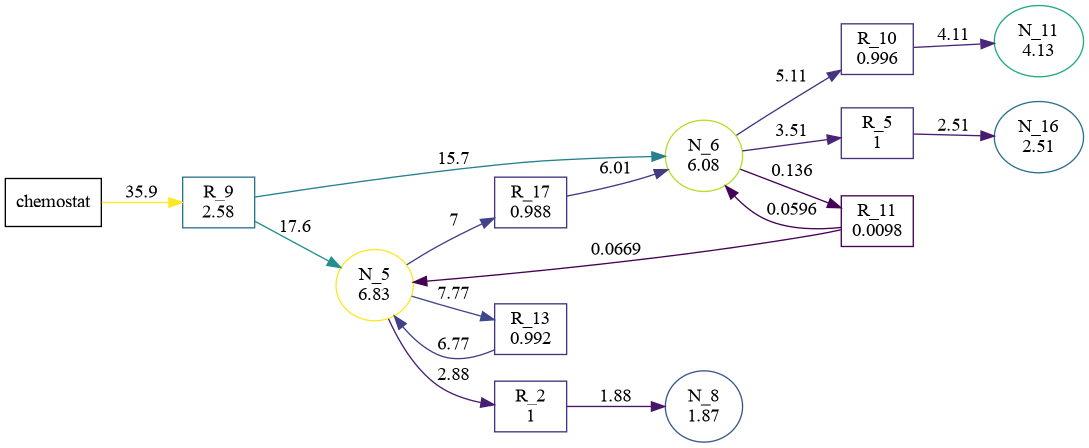

In [110]:
# diagram_sfss_v3(sr.params, fill(1., N+M);
diagram_sfss_v3(sr.params, sr.steadystates;
    strain_threshold=1e-2,
    edge_threshold=1e-5,
    # colorscale=log10,
)

### Linstab

In [51]:
k_to_evals = linstab_make_k_func(ps, ss)
# ks = 10 .^ range(-5, 3, 100)
ks = range(0.001, 50, 1000)
@time evals = k_to_evals.(ks);

  0.158278 seconds (12.00 k allocations: 40.062 MiB)


[ Info: Unstable, mrl is 0.00351939


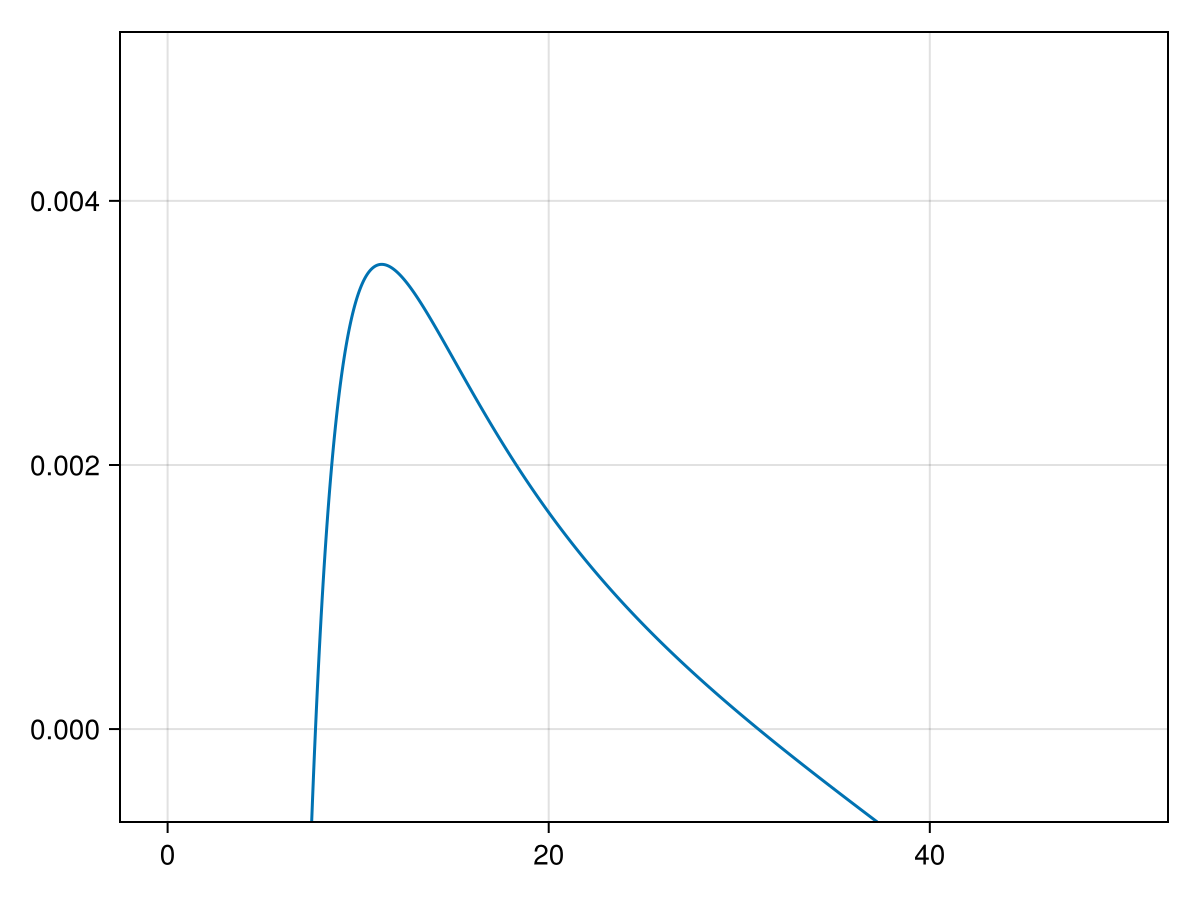

In [52]:
faa = plot_linstab_lambdas(ks, evals;
    axis=(;
        # xscale=log10
    ),
    legend=false
)

# display(GLMakie.Screen(), faa.figure)
faa